In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

import statsmodels.formula.api as smf
import statsmodels.api as sm
import lmdiag

In [3]:
auto = pd.read_csv('data/Auto.csv', na_values='?')
auto = auto.dropna()
auto.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   
3  16.0          8         304.0       150.0    3433          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [4]:
auto.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


&lt;Figure size 1440x1440 with 0 Axes&gt;

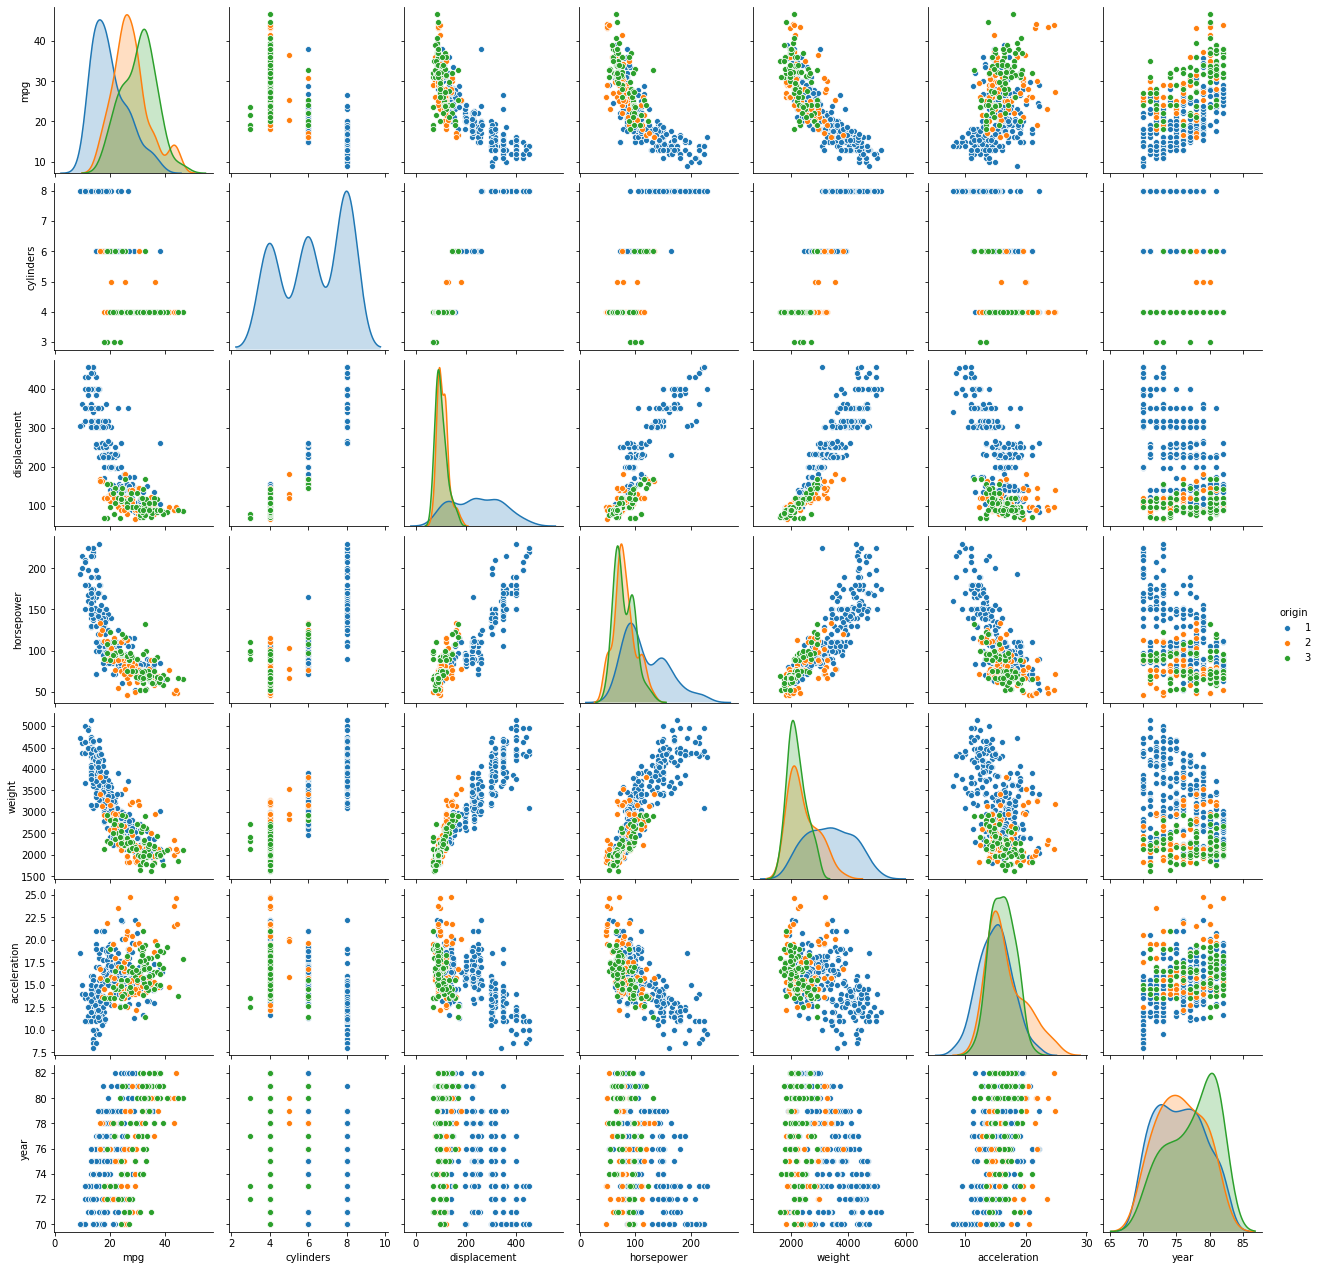

In [5]:
# Pair plot with seaborn
plt.figure(figsize=(20,20))
sb.pairplot(auto, hue='origin')
plt.show()

In [6]:
auto.iloc[:,:-1].corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  
year              0.290316  1.000000  0.181528  
origin            0.212746  0.181528  1.000000

In [7]:
# Write the formula
predictors = auto.columns[1:-1]
f = 'mpg ~ 1 + ' + ' + '.join(predictors)
f

&#39;mpg ~ 1 + cylinders + displacement + horsepower + weight + acceleration + year + origin&#39;

In [8]:
mlm = smf.ols(formula=f, data=auto).fit()
print(mlm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 02 Oct 2020   Prob (F-statistic):          2.04e-139
Time:                        22:59:17   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P&gt;|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707

In [9]:
# Yes, since F-statistic high and p-value nearly 0, there is relationship between predictors and response
# Predictors: displacement, weight, year & origin have statistically significant relationship to the response
# coef Year positive indicate that positive relationship between year and mpg

In [10]:
# It seem that collinear between predictors through pairchart so check VIF to see collinear
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = sm.add_constant(auto.iloc[:,1:-1])
print('Variance Inflation Factor:')
for i in range(len(predictors)):
    print('{:20s}'.format(predictors[i]), '{:4f}'.format(variance_inflation_factor(X.values,i)))

Variance Inflation Factor:
cylinders            763.557531
displacement         10.737535
horsepower           21.836792
weight               9.943693
acceleration         10.831260
year                 2.625806
origin               1.244952


In [11]:
# VIF values higher than 5 indicate collinear problem

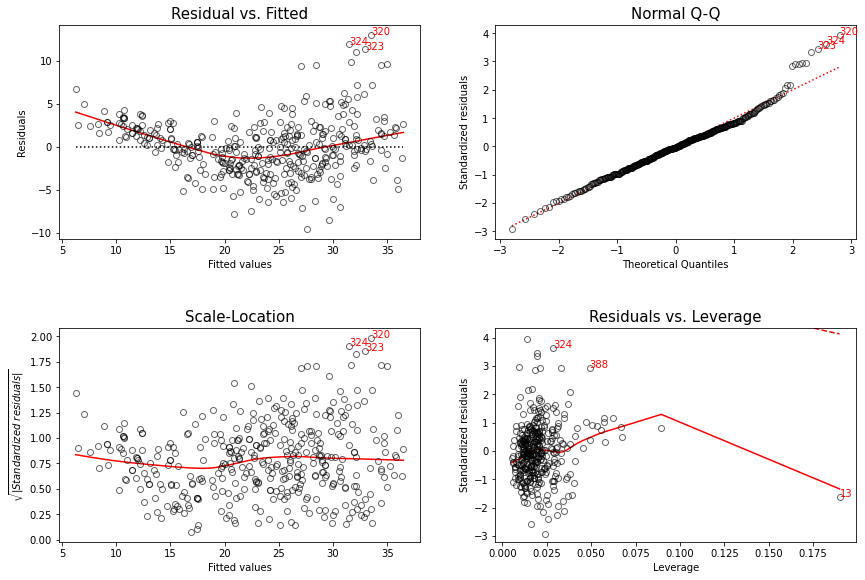

In [12]:
plt.figure(figsize=(12,8))
lmdiag.plot(mlm)
plt.show()

In [13]:
# U-Shape indicate non-linear should be modeled
# Studentized residuals show outliers > 3
# Leverage show high leverage point with value > (p+1)/n = 8/392 ~ 0.02, many high leverage points

In [14]:
# Linearity: The u-shaped pattern in the top-left residual plot suggests that there a non-linear relationship that our model is unable to account for. The bottom left Scale-Location plot suggests that a square-root transform reduces the non-linearity of this relationship allowing our model to achieve an improved fit.

# Heteroscedasticity: A conical pattern is apparent in the top-left plot suggesting that variance of residuals increases with response. The bottom left plot suggests that a square-root transform helps to mitigate this effect.

# Outliers: The top-left plot suggests that there are five potential outliers towards the high end of our predicted responses. The bottom-right plot suggests that these outliers have low leverage, and so probably don't have a overly dispraportionate effect on our model.

# Leverage: The bottom right plot reveals one point with particularly high leverage, although with a value around -1.2 this point isn't an outlier in terms of studentised residuals.

# Normality: The top-right plot shows a normal distribution except for high value residuals. This suggests that the model under-estimates mpg for a larger number of observations than we might expect assuming a normal distribution.

In [15]:
s = ''
for i in range(len(predictors)):
    for j in range(i+1,len(predictors)):
        s = s + ' + ' + '{}'.format(predictors[i]) + ' * ' + '{}'.format(predictors[j])
f_interact = 'mpg ~ 1 + ' + ' + '.join(predictors) + s
f_interact              

&#39;mpg ~ 1 + cylinders + displacement + horsepower + weight + acceleration + year + origin + cylinders * displacement + cylinders * horsepower + cylinders * weight + cylinders * acceleration + cylinders * year + cylinders * origin + displacement * horsepower + displacement * weight + displacement * acceleration + displacement * year + displacement * origin + horsepower * weight + horsepower * acceleration + horsepower * year + horsepower * origin + weight * acceleration + weight * year + weight * origin + acceleration * year + acceleration * origin + year * origin&#39;

In [16]:
ml_interact = smf.ols(formula=f_interact, data=auto).fit()
print(ml_interact.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.2
Date:                Fri, 02 Oct 2020   Prob (F-statistic):          4.01e-155
Time:                        22:59:20   Log-Likelihood:                -929.72
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P&gt;|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept          

In [17]:
ml_interact.pvalues[ml_interact.pvalues < 0.05].sort_values()

origin                 0.003446
acceleration:origin    0.003655
acceleration           0.007354
displacement           0.011921
displacement:year      0.013516
acceleration:year      0.030331
dtype: float64

In [18]:
f_log = 'np.log(mpg) ~ 1 + ' + ' + '.join(predictors)
ml_log = smf.ols(formula=f_log, data=auto).fit()
print(ml_log.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(mpg)   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     400.4
Date:                Fri, 02 Oct 2020   Prob (F-statistic):          3.98e-172
Time:                        22:59:20   Log-Likelihood:                 281.90
No. Observations:                 392   AIC:                            -547.8
Df Residuals:                     384   BIC:                            -516.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P&gt;|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.7509      0.166     10.533

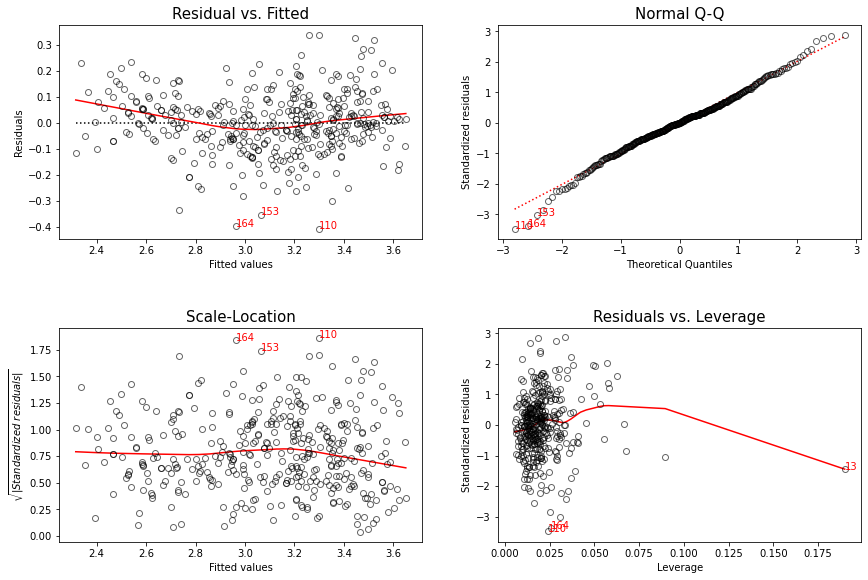

In [19]:
plt.figure(figsize=(12,8))
lmdiag.plot(ml_log)
plt.show()

In [20]:
f_sqrt = 'np.sqrt(mpg) ~ 1 + ' + ' + '.join(predictors)
ml_sqrt = smf.ols(formula=f_sqrt, data=auto).fit()
print(ml_sqrt.summary())

                            OLS Regression Results                            
Dep. Variable:           np.sqrt(mpg)   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     326.3
Date:                Fri, 02 Oct 2020   Prob (F-statistic):          2.41e-157
Time:                        22:59:22   Log-Likelihood:                -89.790
No. Observations:                 392   AIC:                             195.6
Df Residuals:                     384   BIC:                             227.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P&gt;|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0753      0.429      2.506

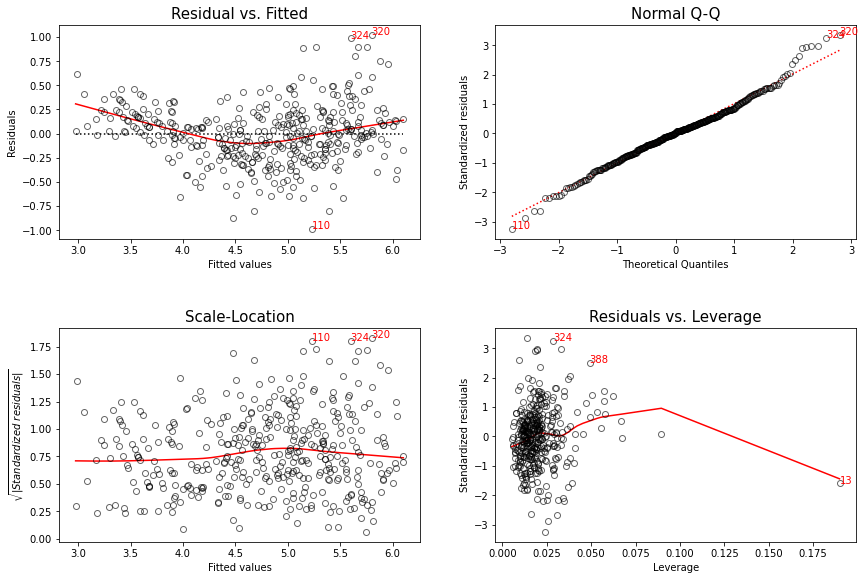

In [21]:
plt.figure(figsize=(12,8))
lmdiag.plot(ml_sqrt)
plt.show()

In [25]:
x = ''
for i in range(len(predictors)):
    for j in range(i+1,len(predictors)):
        x = x + ' + np.log(' + '{}'.format(predictors[i]) + ' * ' + '{}'.format(predictors[j]) + ')'
k = ''
for i in range(len(predictors)):
    k = k + ' + np.log(' + '{}'.format(predictors[i]) + ')'
f_loginteract = 'np.log(mpg) ~ 1' + k + x
f_loginteract

&#39;np.log(mpg) ~ 1 + np.log(cylinders) + np.log(displacement) + np.log(horsepower) + np.log(weight) + np.log(acceleration) + np.log(year) + np.log(origin) + np.log(cylinders * displacement) + np.log(cylinders * horsepower) + np.log(cylinders * weight) + np.log(cylinders * acceleration) + np.log(cylinders * year) + np.log(cylinders * origin) + np.log(displacement * horsepower) + np.log(displacement * weight) + np.log(displacement * acceleration) + np.log(displacement * year) + np.log(displacement * origin) + np.log(horsepower * weight) + np.log(horsepower * acceleration) + np.log(horsepower * year) + np.log(horsepower * origin) + np.log(weight * acceleration) + np.log(weight * year) + np.log(weight * origin) + np.log(acceleration * year) + np.log(acceleration * origin) + np.log(year * origin)&#39;

In [26]:
ml_log_interact = smf.ols(formula=f_loginteract, data=auto).fit()
print(ml_log_interact.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(mpg)   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     445.3
Date:                Fri, 02 Oct 2020   Prob (F-statistic):          5.86e-180
Time:                        23:02:34   Log-Likelihood:                 300.34
No. Observations:                 392   AIC:                            -584.7
Df Residuals:                     384   BIC:                            -552.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P&gt;|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

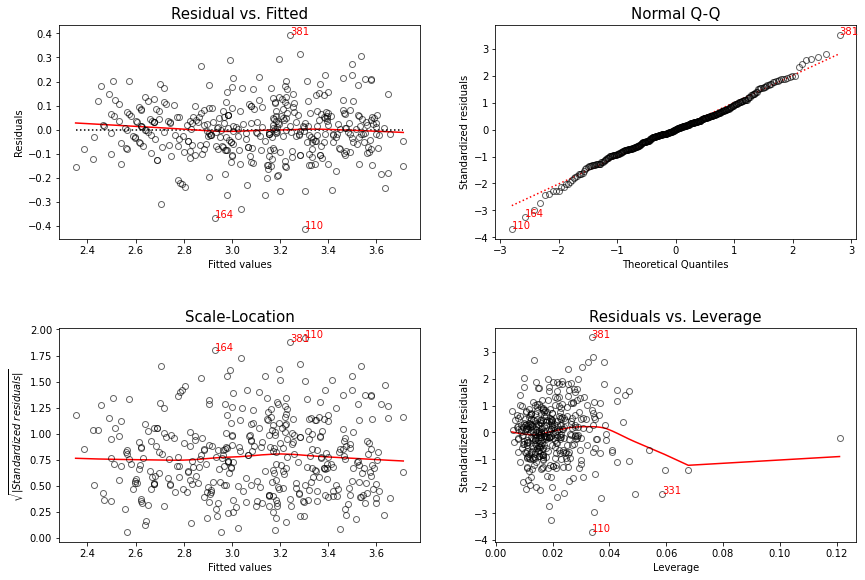

In [27]:
plt.figure(figsize=(12,8))
lmdiag.plot(ml_log_interact)
plt.show()

In [70]:
l = ''
for i in range(len(predictors)):
    l = l + ' + I(' + '{}'.format(predictors[i]) + '**2)'
f_squared = 'np.log(mpg) ~ 1 + ' + ' + '.join(predictors) + s + l
f_squared 

&#39;np.log(mpg) ~ 1 + cylinders + displacement + horsepower + weight + acceleration + year + origin + cylinders * displacement + cylinders * horsepower + cylinders * weight + cylinders * acceleration + cylinders * year + cylinders * origin + displacement * horsepower + displacement * weight + displacement * acceleration + displacement * year + displacement * origin + horsepower * weight + horsepower * acceleration + horsepower * year + horsepower * origin + weight * acceleration + weight * year + weight * origin + acceleration * year + acceleration * origin + year * origin + I(cylinders**2) + I(displacement**2) + I(horsepower**2) + I(weight**2) + I(acceleration**2) + I(year**2) + I(origin**2)&#39;

In [71]:
ml_squared = smf.ols(formula=f_squared, data=auto).fit()
print(ml_squared.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(mpg)   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     111.5
Date:                Fri, 02 Oct 2020   Prob (F-statistic):          1.22e-169
Time:                        23:23:09   Log-Likelihood:                 353.50
No. Observations:                 392   AIC:                            -635.0
Df Residuals:                     356   BIC:                            -492.0
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P&gt;|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept          

In [76]:
significant_predictors = ml_squared.pvalues[ml_squared.pvalues<0.01].drop('Intercept').index
significant_predictors

Index([&#39;displacement&#39;, &#39;acceleration&#39;, &#39;year&#39;, &#39;origin&#39;, &#39;acceleration:origin&#39;,
       &#39;I(year ** 2)&#39;],
      dtype=&#39;object&#39;)

In [77]:
f_significant = 'np.log(mpg) ~ 1 + ' + ' + '.join(significant_predictors)
f_significant

&#39;np.log(mpg) ~ 1 + displacement + acceleration + year + origin + acceleration:origin + I(year ** 2)&#39;

In [78]:
ml_end = smf.ols(formula=f_significant, data=auto).fit()
print(ml_end.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(mpg)   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     358.5
Date:                Fri, 02 Oct 2020   Prob (F-statistic):          3.50e-154
Time:                        23:23:29   Log-Likelihood:                 236.58
No. Observations:                 392   AIC:                            -459.2
Df Residuals:                     385   BIC:                            -431.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P&gt;|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              18.9521 

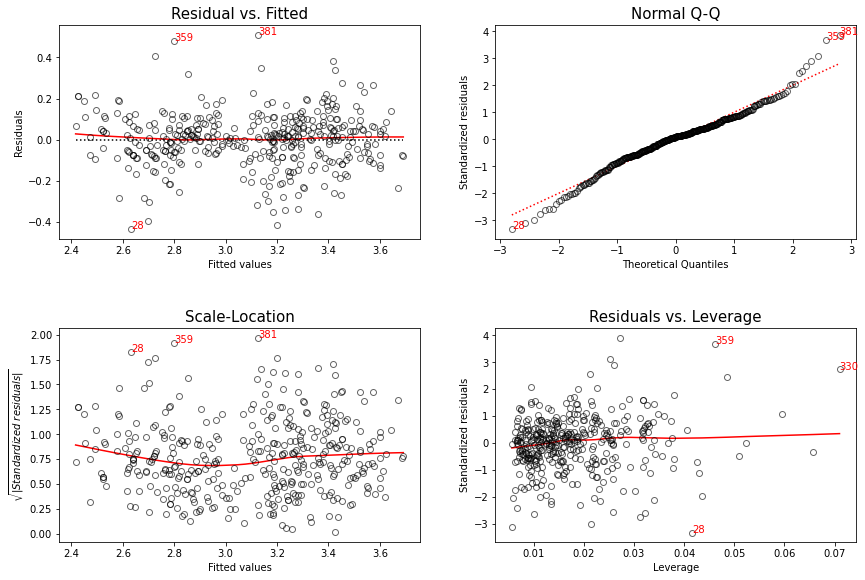

In [79]:
plt.figure(figsize=(12,8))
lmdiag.plot(ml_end)
plt.show()